<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/Stock_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://deephaven.io/blog/2022/04/25/yfinance/">Starting Point</a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter a time period:
Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
1y
Enter an interval:
Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
5d
Enter a ticker or list of tickers seperated by commas with no spaces:
VOO,DIA,QQQ
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

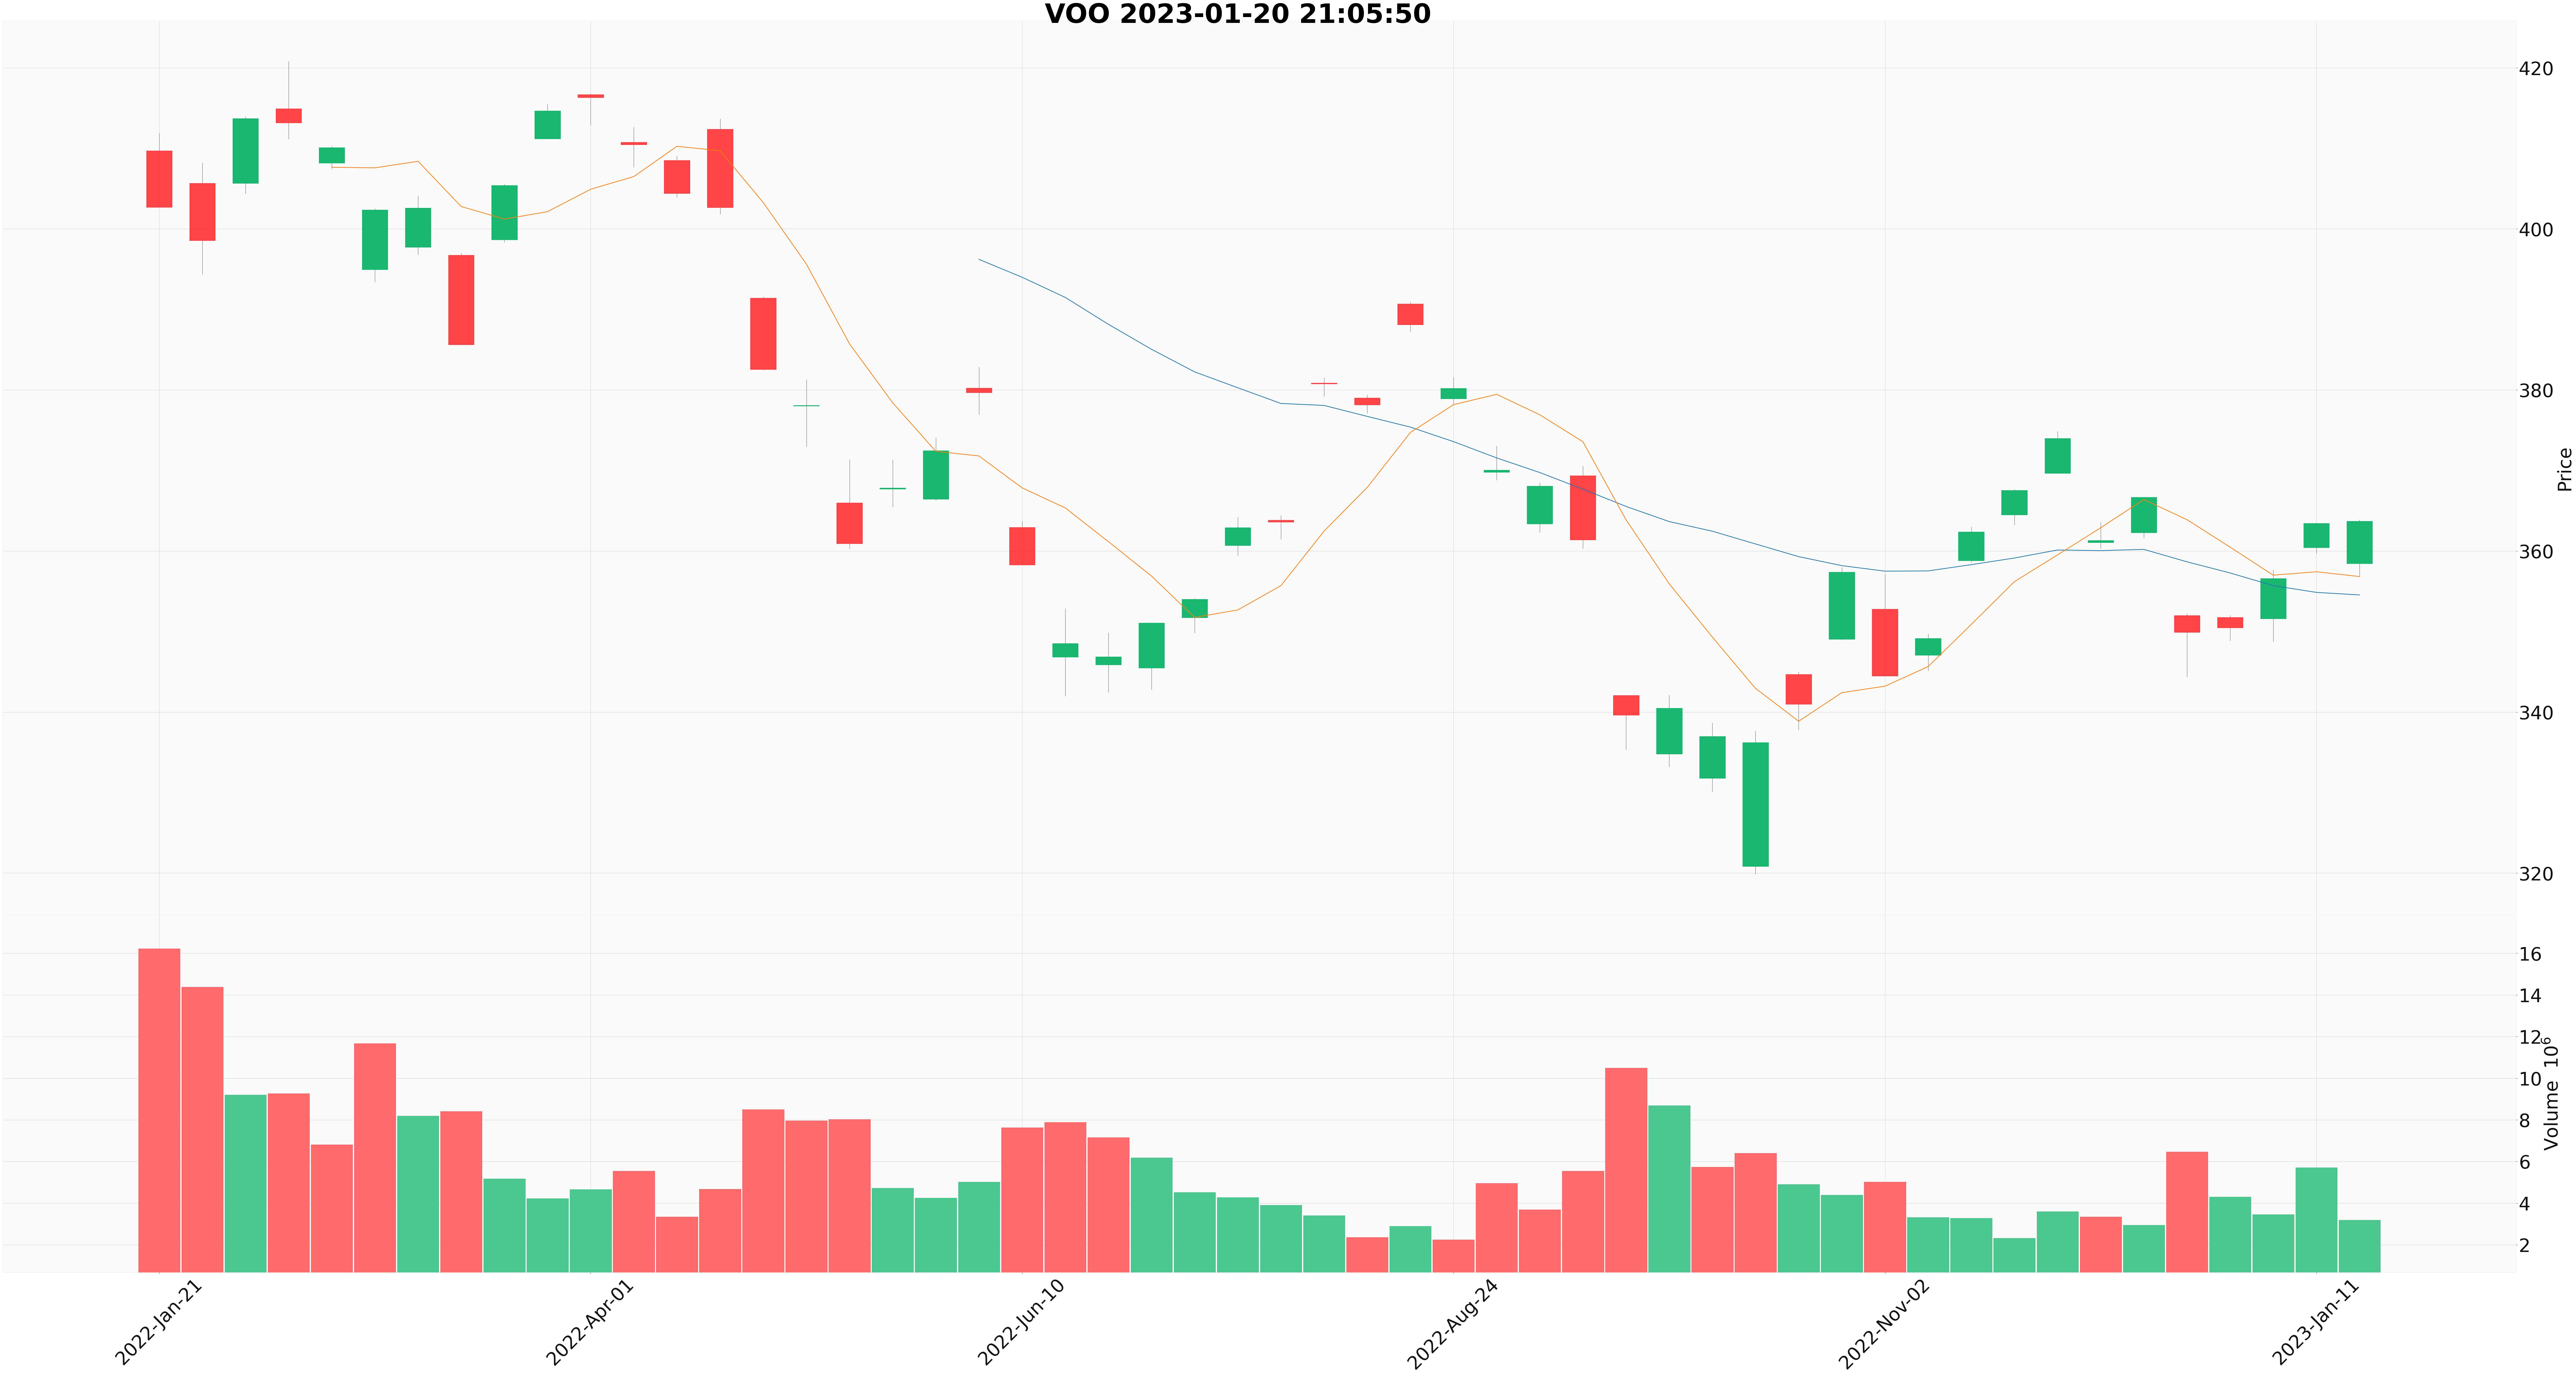

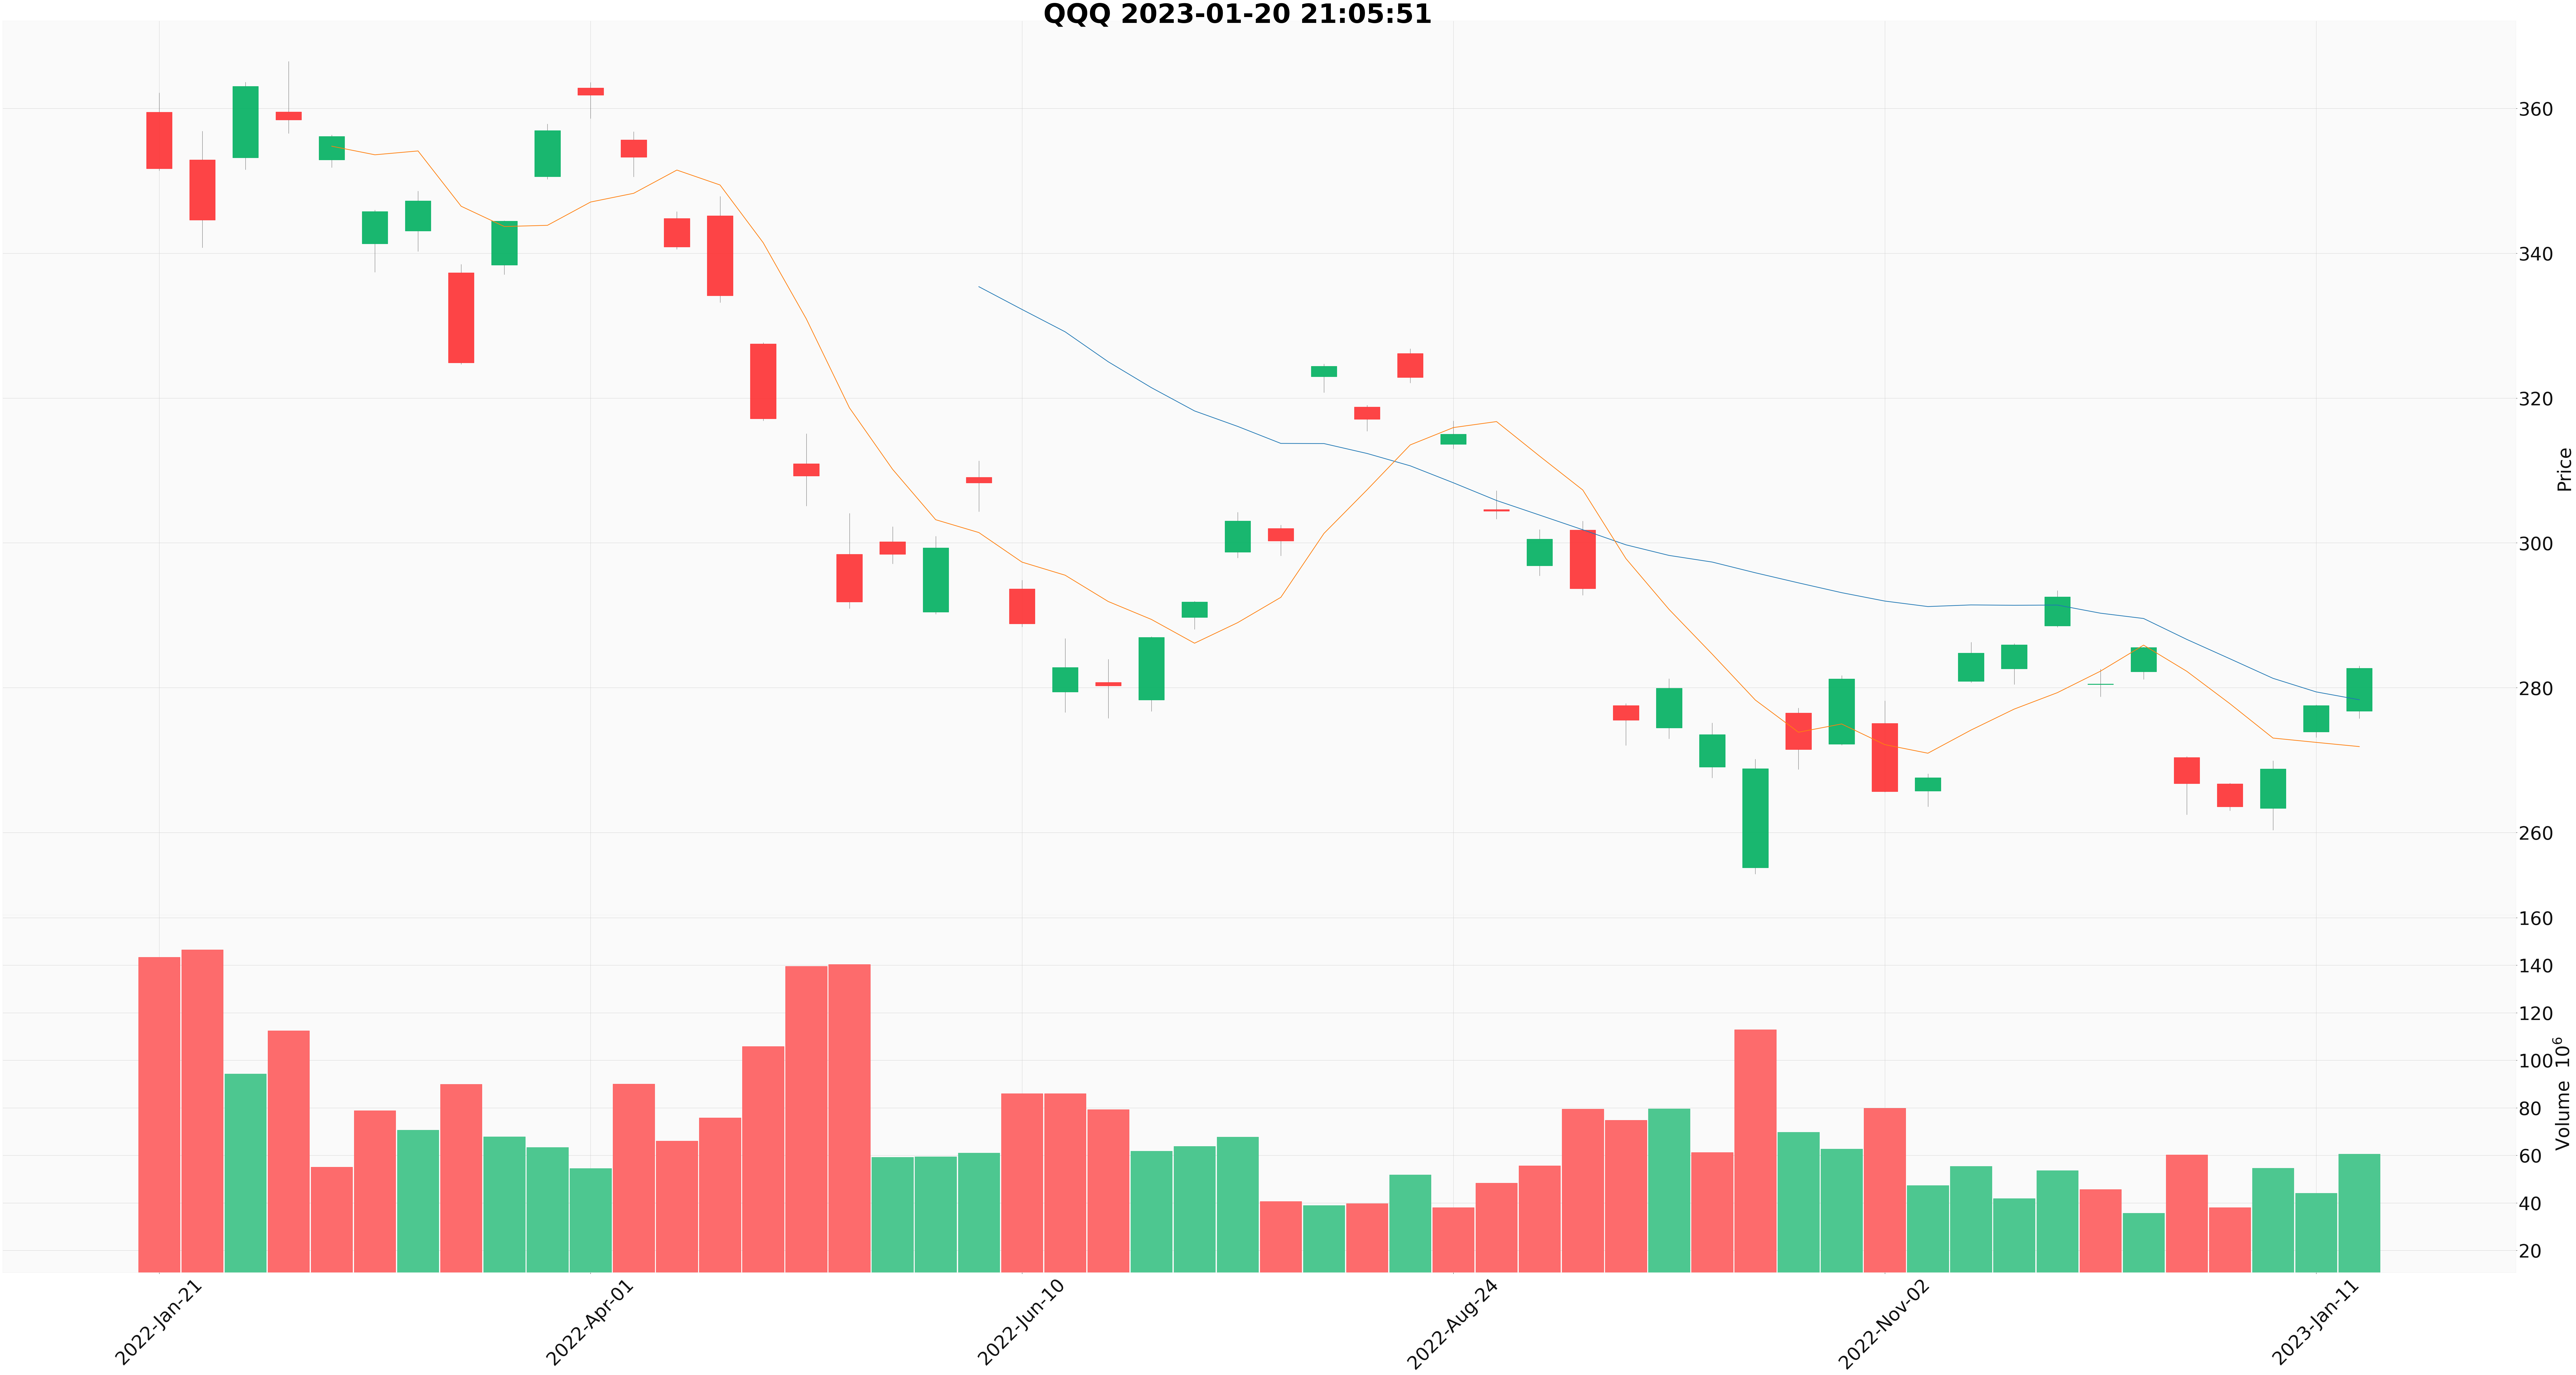

In [9]:
# starting point: https://deephaven.io/blog/2022/04/25/yfinance/

# imports and installs
!pip install yfinance
!pip install mplfinance
import datetime
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from google.colab import files
from pytz import timezone

eastern = timezone('US/Eastern')

style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 50})

# valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
period = input('Enter a time period:\nValid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max\n')

# valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
interval = input('Enter an interval:\nValid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo\n')

# the stocks you want to plot
stocks = input('Enter a ticker or list of tickers seperated by commas with no spaces:\n').split(',')

# method to grab data and plot the data
def plot_stocks_df(stocks, period=period , interval=interval):
  for stock in stocks:
    hist = yf.download(tickers=stock, period=period, interval=interval)
    fname = stock + '.pdf'
    fig1, _ = mpf.plot(hist,
      type='candle',
      style=style,
      figsize =(100,50), 
      volume=True,
      mav=(20,5),
      axisoff=False,
      title = stock+" "+datetime.datetime.now(eastern).strftime("%Y-%m-%d %H:%M:%S"),
      returnfig=True, 
      scale_padding=0.2)
    
    fig1.savefig(fname,dpi=100)
    files.download(fname)

# call the method
plot_stocks_df(stocks, period, interval)